In [14]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [15]:
import seaborn as sns
%reload_ext autoreload
%autoreload 2
#from my_utils.score import test_func , conf_matrix
from my_utils.print_lines import *

font = {'size'   : 14}
plt.rc('font', **font)

In [16]:
def conf_matrix(model ,x, oh_yt , plot=0):
    '''
    return confusion matrix
    Parameters :
        model -  Keras model
        x - test/training data
        oh_yt =  one hot encoded test labels
    '''
    y_pred_prob = model.predict(x)
    #y_pred=  [np.argmax(yi) for yi in y_pred]
    y_pred = []
    for yi in y_pred_prob:
        temp = [0]*len(yi)
        temp[np.argmax(yi)] = 1
        y_pred.append(temp)
    y_pred =  np.asarray(y_pred)
    #print(y)
    cf = np.matmul(oh_yt.T , y_pred)
    return cf

In [17]:
def class_to_int(label , cl):
    temp = []
    for i in range(len(label)):
        #print(label[i])
        for j in range(len(cl)):
            if(label[i]==cl[j]):
                temp.append(j) 
    return temp
classes = ['BH' ,'NS' ]

In [18]:
#display(data)
def filter_data(data):
    
    max_flux = 12
    min_flux = 26
    ob_id = np.arange(0,len(data))
    data.insert(0 , 'obs_id' , ob_id)
    data = data[data['flux_aper']>max_flux]
    data = data[data['flux_aper']<min_flux]
    data = data[data['flux_aper_lolim']<min_flux]
    data = data[data['flux_aper_hilim']>(max_flux-2)]
    data = data[data['significance']>5]
    
    data = data.sample(frac=1)
    #display(data)
    data_class = data[['class']]
    data_id = data['src_id']
    data_name = data['src_name']
    obs_id = data['obs_id']
    data_val = data.drop(columns=['flux_significance' , 'index' , 'livetime' , 'gti_obs' , 'significance' , 'likelihood' , 'class' ,'src_id' ,'src_name' , 'obs_id'])
    data_sig = data[['significance']]
    #display(data_val)
    import missingno as msno
    #msno.matrix(data_val)
    #plt.show()

    data_val = data_val.replace(np.nan , 0)
    data = data.replace(np.nan , 0 )
    for d in data_val:
        mean = np.mean(data_val[d])
        var = np.var(data_val[d])
        data_val[d] = (data_val[d]-mean)/var
        data_val[d] = data_val[d] / np.amax(data_val[d])
    #msno.matrix(data_val)
    #plt.show()
    
    #display(data_val)
    return data , data_val , data_class , data_id , data_sig , obs_id

In [19]:
model = keras.models.load_model('models/NN_NS_BH.mdl/')

(37, 2)


(30, 2)


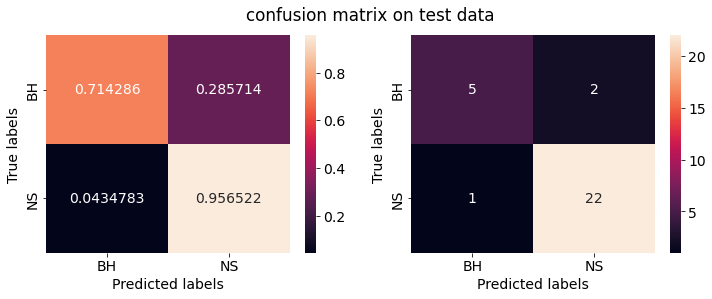

,obs_id,index,is_ok,class,pred_class,prob,src_id,src_name,livetime,significance,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
2,2,2,0,BH,NS,0.915649,BH0003,GINGA 1354-645,19803.6,20.86,...,0.000000,0.000000,0.0000,0.0000,0.00,0.00,0.0000,0.0000,0.0000,0.00
1,1,1,0,BH,NS,0.987753,BH0003,GINGA 1354-645,19807.2,20.86,...,0.000000,0.000000,0.0000,0.0000,0.00,0.00,0.0000,0.0000,0.0000,0.00
0,0,0,1,BH,BH,0.995861,BH0003,GINGA 1354-645,39516.5,20.86,...,13.372737,13.236872,5.1390,2.6140,76.58,54.17,0.7901,0.6270,35.2000,13.05
5,5,2,1,BH,BH,0.996430,BH0008,IGR J17464-3213,40036.9,6.90,...,0.000000,0.000000,0.0000,0.0000,0.00,0.00,0.0000,0.0000,0.0000,0.00
4,4,1,1,BH,BH,0.994719,BH0008,IGR J17464-3213,28362.6,6.90,...,0.000000,0.000000,0.0000,0.0000,0.00,0.00,0.0000,0.0000,0.0000,0.00
3,3,0,1,BH,BH,0.990106,BH0008,IGR J17464-3213,22445.1,6.90,...,0.000000,0.000000,0.0000,0.0000,0.00,0.00,0.0000,0.0000,0.0000,0.00
13,13,0,1,BH,BH,0.999291,BH0016,CXOU J100510.0-07452,36978.6,7.77,...,0.000000,0.000000,0.0000,0.0000,0.00,0.00,0.0000,0.0000,0.0000,0.00
1,15,1,0,NS,BH,0.971725,NS0003,1A 1743-288,38198.1,42.80,...,0.000000,0.000000,0.0000,0.0000,0.00,0.00,0.0000,0.0000,0.0000,0.00
3,17,1,1,NS,NS,1.000000,NS0016,CEN X-4,10141.5,49.44,...,12.695725,12.631713,4.4810,2.6480,97.61,0.00,0.2000,0.1878,0.6267,0.00
2,16,0,1,NS,NS,1.000000,NS0016,CEN X-4,9561.4,49.44,...,12.310336,12.275315,2.6550,2.3550,101.60,0.00,0.2019,0.2000,0.3492,0.00


In [20]:
test_bh = pd.read_csv('processed_data/BH_test.csv')
test_ns = pd.read_csv('processed_data/NS_test.csv')
test = pd.concat([test_bh , test_ns ] , axis=0)
test_data , t_val , t_class , t_id , t_sig , t_ob_id = filter_data(test)


params_used = []
for t in t_val:
    params_used.append(t)
params_used = np.asarray(params_used)

t_class_int = class_to_int(t_class.to_numpy(),  classes)
#y_test_int = class_to_int(y_test, classes)
one_hot_t_class =  to_categorical(t_class_int)
x_test = t_val.to_numpy()
#display(t_val.describe())
one_hot_y_test =  to_categorical(t_class_int)
print(one_hot_y_test.shape)
#for y_i , y_j in zip(y_train , one_hot_y_train):
##    print(y_i , y_j)



cf = conf_matrix(model , x_test, one_hot_y_test)
c = np.asarray([[ci /sum(c_row) for ci in c_row] for c_row in cf])
fig , ax = plt.subplots(nrows=1 , ncols=2 , figsize=(12,4)) 
#ax = 
sns.heatmap(c, annot=True, fmt='g', ax=ax[0]);  #annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cf, annot=True, fmt='g', ax=ax[1]); 
# labels, title and ticks
for a in ax:
    a.set_xlabel('Predicted labels')
    a.set_ylabel('True labels')
    #ax[0].set_title('Confusion Matrix Test Data'); 
    a.xaxis.set_ticklabels(['BH', 'NS']) 
    a.yaxis.set_ticklabels(['BH', 'NS'])
plt.suptitle('confusion matrix on test data')
plt.show()
plt.close()




test_data_result = test_data.copy(deep=True)
y_prob = model.predict(x_test)

y_pred = []
for yi in y_prob:
    temp = [int(0)]*len(yi)
    temp[np.argmax(yi)] = int(1)
    y_pred.append(temp)
y_pred =  np.asarray(y_pred)

y_prob_val = [np.amax(yi) for yi in y_prob]
y_prob_class =[classes[np.argmax(yi)] for yi in y_prob]
y_truth = [np.dot(yi , yt) for yi , yt in zip(y_pred , one_hot_y_test)]
y_truth = np.asarray(y_truth)
test_data_result.insert(3 ,'pred_class' , y_prob_class)
test_data_result.insert(4 ,'prob' , y_prob_val)
test_data_result.insert(2 ,'is_ok' , y_truth.astype(int))

test_data_result = test_data_result.sort_values(by='src_id' , axis=0)
test_data_result.drop(columns=['index'])
display(test_data_result)
test_data_result.to_csv('pred_result/NS_BH_test.csv')

## Feature Correlation

In [52]:
param_imp = pd.DataFrame()
param_imp.insert(0,'feat' ,params_used)

cl = 0
y_prob_c1 = y_prob[:,cl]
param_corr = []
for p in params_used:
    feat_val = t_val[p].to_numpy()
    corr = abs(np.corrcoef(feat_val , y_prob_c1)[0,1])
    param_corr.append(corr)
param_imp.insert(1,'corr_coef' ,param_corr)

param_imp = param_imp.sort_values(by='corr_coef' , axis = 0 , ascending=False)
display(param_imp)
param_imp.to_csv('pred_result/param_imp_test.csv')




,feat,corr_coef
11,flux_aper_hilim,0.436949
30,photflux_aper_hilim_u,0.392179
13,flux_aper,0.360457
14,photflux_aper_hilim,0.320802
12,flux_aper_lolim,0.281272
...,...,...
47,hard_hm,0.021880
10,var_index,0.009476
28,photflux_aper_hilim_h,0.008849
18,photflux_aper_h,0.007414


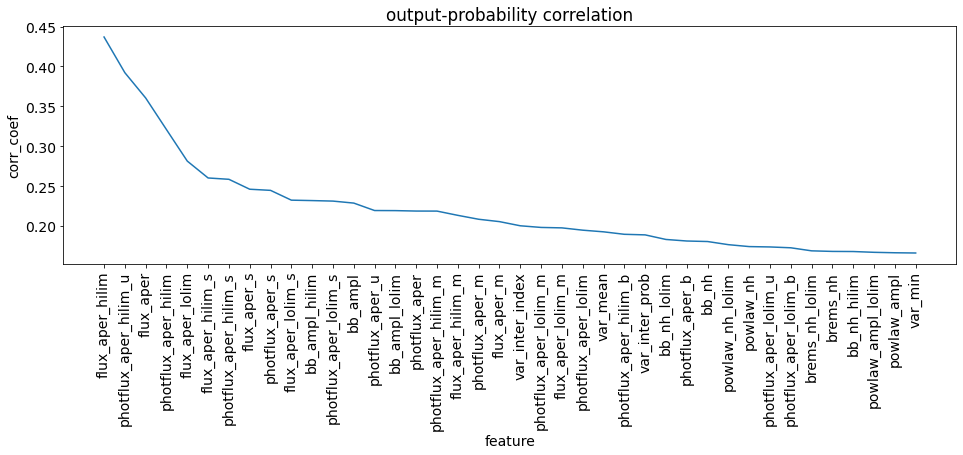

In [70]:
fig , ax = plt.subplots(nrows=1 , ncols=1 , figsize=(16,10))
sns.lineplot(
    data = param_imp[:40] , 
    x='feat' , y = 'corr_coef',
    )
plt.xticks(rotation=90)
plt.title('output-probability correlation')
plt.xlabel('feature')

# alternate option without .gcf
plt.subplots_adjust(bottom=0.55)
plt.savefig('pred_result/plots/output-prob-corr.jpg')
plt.show()

(370, 2)


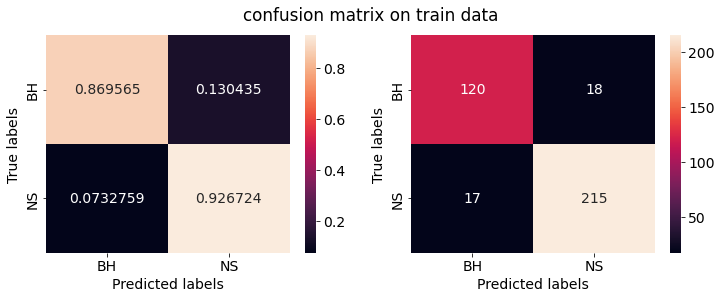

,obs_id,index,is_ok,class,pred_class,prob,src_id,src_name,livetime,significance,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
2,2,2,0,BH,NS,0.764978,BH0001,1A 0620-00,29673.9,23.63,...,13.083178,13.013990,4.3130,2.7990,17.89,8.830,0.6263,0.5576,0.8602,0.00
0,0,0,1,BH,BH,0.509465,BH0001,1A 0620-00,41932.7,23.63,...,0.000000,0.000000,0.0000,0.0000,0.00,0.000,0.0000,0.0000,0.0000,0.00
1,1,1,0,BH,NS,0.662353,BH0001,1A 0620-00,39623.0,23.63,...,13.433798,13.353400,3.1340,2.0000,15.48,6.992,0.5002,0.4332,1.0350,0.00
10,10,0,1,BH,BH,0.994433,BH0004,GRO J1655-40,42550.7,13.83,...,0.000000,0.000000,0.0000,0.0000,0.00,0.000,0.0000,0.0000,0.0000,0.00
11,11,1,0,BH,NS,0.593866,BH0004,GRO J1655-40,18207.1,13.83,...,13.196065,13.052468,3.5500,1.9820,168.60,113.200,0.8334,0.6885,89.6000,46.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,630,13,1,NS,NS,0.999997,NS0078,1WGA J1911.2+0035,6627.6,44.36,...,12.166534,12.131121,0.7791,0.6776,51.43,45.000,0.3442,0.3180,27.1700,20.85
426,622,5,1,NS,NS,0.999971,NS0078,1WGA J1911.2+0035,7787.8,44.36,...,12.486383,12.428058,0.8498,0.6925,45.48,37.500,0.3499,0.3113,23.3300,15.09
441,637,0,1,NS,NS,0.999909,NS0083,E2259+587,24783.0,114.17,...,11.891435,11.875170,1.5250,1.4110,88.92,83.260,0.5262,0.5079,49.7400,44.93
442,638,0,1,NS,NS,0.990624,NS0084,GRO J1744-28,10619.0,5.50,...,0.000000,0.000000,0.0000,0.0000,0.00,0.000,0.0000,0.0000,0.0000,0.00


In [40]:
test_bh = pd.read_csv('processed_data/BH_train.csv')
test_ns = pd.read_csv('processed_data/NS_train.csv')
test = pd.concat([test_bh , test_ns ] , axis=0)
test_data , t_val , t_class , t_id , t_sig , t_ob_id = filter_data(test)


t_class_int = class_to_int(t_class.to_numpy(),  classes)
#y_test_int = class_to_int(y_test, classes)
one_hot_t_class =  to_categorical(t_class_int)
x_test = t_val.to_numpy()
#display(t_val.describe())
one_hot_y_test =  to_categorical(t_class_int)
print(one_hot_y_test.shape)
#for y_i , y_j in zip(y_train , one_hot_y_train):
##    print(y_i , y_j)



cf = conf_matrix(model , x_test, one_hot_y_test)
c = np.asarray([[ci /sum(c_row) for ci in c_row] for c_row in cf])
fig , ax = plt.subplots(nrows=1 , ncols=2 , figsize=(12,4)) 
#ax = 
sns.heatmap(c, annot=True, fmt='g', ax=ax[0]);  #annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cf, annot=True, fmt='g', ax=ax[1]); 
# labels, title and ticks
for a in ax:
    a.set_xlabel('Predicted labels')
    a.set_ylabel('True labels')
    #ax[0].set_title('Confusion Matrix Test Data'); 
    a.xaxis.set_ticklabels(['BH', 'NS']) 
    a.yaxis.set_ticklabels(['BH', 'NS'])
plt.suptitle('confusion matrix on train data')
plt.show()
plt.close()




test_data_result = test_data.copy(deep=True)
y_prob = model.predict(x_test)

y_pred = []
for yi in y_prob:
    temp = [int(0)]*len(yi)
    temp[np.argmax(yi)] = int(1)
    y_pred.append(temp)
y_pred =  np.asarray(y_pred)

y_prob_val = [np.amax(yi) for yi in y_prob]
y_prob_class =[classes[np.argmax(yi)] for yi in y_prob]
y_truth = [np.dot(yi , yt) for yi , yt in zip(y_pred , one_hot_y_test)]
y_truth = np.asarray(y_truth)
test_data_result.insert(3 ,'pred_class' , y_prob_class)
test_data_result.insert(4 ,'prob' , y_prob_val)
test_data_result.insert(2 ,'is_ok' , y_truth.astype(int))

test_data_result = test_data_result.sort_values(by='src_id' , axis=0)
test_data_result.drop(columns=['index'])
display(test_data_result)
test_data_result.to_csv('pred_result/NS_BH_train.csv')

,feat,corr_coef
11,flux_aper_hilim,0.436949
30,photflux_aper_hilim_u,0.392179
13,flux_aper,0.360457
14,photflux_aper_hilim,0.320802
12,flux_aper_lolim,0.281272
...,...,...
47,hard_hm,0.021880
10,var_index,0.009476
28,photflux_aper_hilim_h,0.008849
18,photflux_aper_h,0.007414


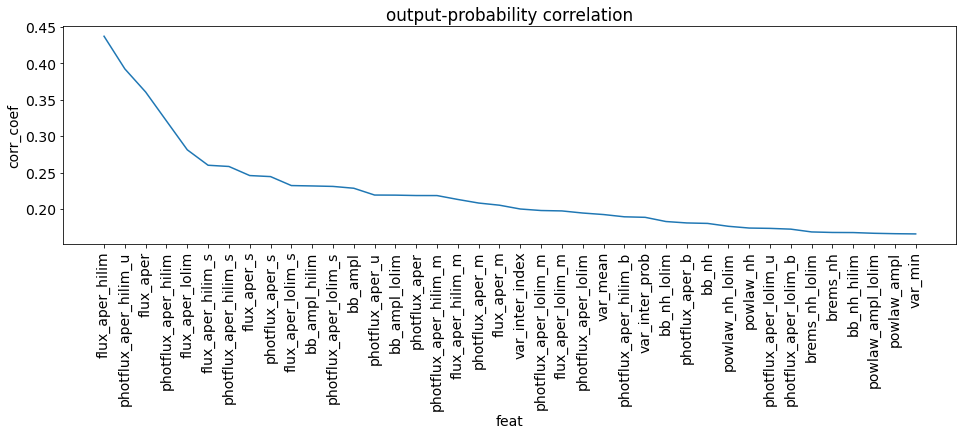

In [50]:
param_imp = pd.DataFrame()
param_imp.insert(0,'feat' ,params_used)

cl = 0
y_prob_c1 = y_prob[:,cl]
param_corr = []
for p in params_used:
    feat_val = t_val[p].to_numpy()
    corr = abs(np.corrcoef(feat_val , y_prob_c1)[0,1])
    param_corr.append(corr)
param_imp.insert(1,'corr_coef' ,param_corr)

param_imp = param_imp.sort_values(by='corr_coef' , axis = 0 , ascending=False)
display(param_imp)
param_imp.to_csv('pred_result/param_imp_train.csv')

fig , ax = plt.subplots(nrows=1 , ncols=1 , figsize=(16,4))
sns.lineplot(
    data = param_imp[:40] , 
    x='feat' , y = 'corr_coef',
    )
plt.xticks(rotation=90)
plt.title('output-probability correlation')
plt.show()